In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
df=pd.read_csv('/content/IMDB Dataset.csv')

In [21]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [22]:
def preprocess(text):
    # Convert to lowercase
    text_lower = text.lower()

    # Remove HTML tags
    soup = BeautifulSoup(text_lower, 'html.parser')
    clean_text = soup.get_text()

    return clean_text

In [5]:
# Apply preprocessing to all reviews
df['review'] = df['review'].apply(preprocess)

# Tokenizer setup: limit to top 10,000 words
tokenizer = Tokenizer(num_words=10000)  # default split handles all whitespace
tokenizer.fit_on_texts(df['review'])

# Tokenize and pad all reviews at once
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=500)

# Replace the review column with the padded sequences
df['review'] = list(padded_sequences)


In [6]:
df

,review,sentiment
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",positive
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",positive
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",positive
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",positive
...,...,...
49995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",positive
49996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
49997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
49998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative


In [7]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


<ipython-input-8-a6a912b9b476>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Blues_d')


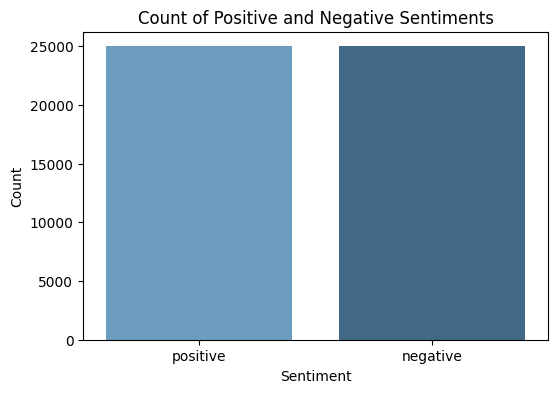

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of positive and negative sentiments
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Blues_d')
plt.title('Count of Positive and Negative Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [9]:
X = np.array(df['review'].tolist())
y=df['sentiment']
y = df['sentiment'].map({'positive': 0, 'negative': 1})

In [10]:
X

array([[   0,    0,    0, ...,  124, 4102,  485],
       [   0,    0,    0, ..., 1975,   68,  220],
       [   0,    0,    0, ...,   62,   15,  349],
       ...,
       [   0,    0,    0, ...,    2,    2, 6043],
       [   0,    0,    0, ...,   66,  738,   40],
       [   0,    0,    0, ...,  792,   10,   16]], dtype=int32)

In [11]:
y

,sentiment
0,0
1,0
2,0
3,1
4,0
...,...
49995,0
49996,1
49997,1
49998,1


In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from tensorflow.keras.layers import GlobalAveragePooling1D,Dropout


model = Sequential([
    Embedding(input_dim=10000, output_dim=16,input_shape=(500,)),
    GlobalAveragePooling1D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 500, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,017 (625.07 KB)

 Trainable params: 160,017 (625.07 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
HISTORY = model.fit(xtrain, ytrain, validation_split = 0.2, epochs = 15, verbose = 1, batch_size = 32)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5575 - loss: 0.6857 - val_accuracy: 0.7511 - val_loss: 0.6370
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7071 - loss: 0.6159 - val_accuracy: 0.8129 - val_loss: 0.5280
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7801 - loss: 0.5165 - val_accuracy: 0.8405 - val_loss: 0.4440
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8287 - loss: 0.4341 - val_accuracy: 0.8531 - val_loss: 0.3906
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8489 - loss: 0.3870 - val_accuracy: 0.8625 - val_loss: 0.3555
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.3548 - val_accuracy: 0.8770 - val_loss: 0.3286
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8696 - loss: 0.3316 - val_accuracy: 0.8798 - val_loss: 0.3133
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8817 - loss: 0.3049 - 

Text(0, 0.5, 'accuracy')

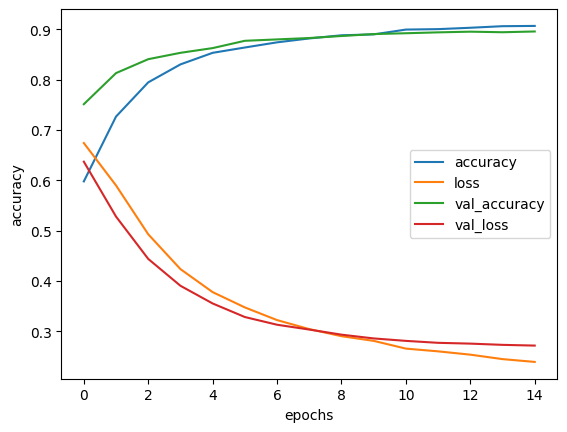

In [38]:
pd.DataFrame(HISTORY.history).plot()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [39]:
# Predict on the test data
predictions = model.predict(xtest)
predictions = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


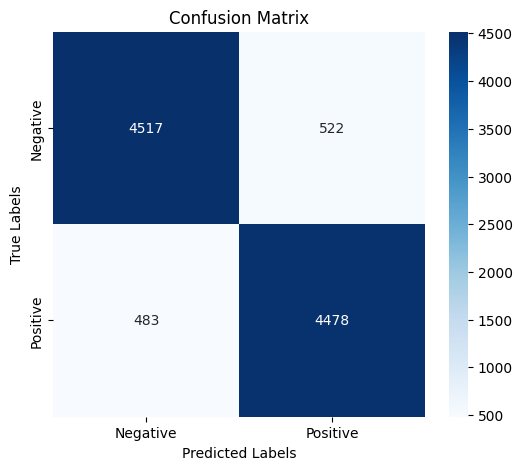

In [40]:
# Generate confusion matrix
cm = confusion_matrix(ytest, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [41]:
loss, accuracy = model.evaluate(xtest, ytest, verbose=2)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 - 1s - 4ms/step - accuracy: 0.8995 - loss: 0.2571
Test loss: 0.2570528984069824
Test accuracy: 0.8995000123977661
